In [4]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

print('GPU name: {}'.format(tf.test.gpu_device_name()))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.1
GPU name: /device:GPU:0


In [2]:
import numpy as np

# Sequence modelling 

## Coding tutorials
 #### 1.  The IMDb dataset
 #### 2. Padding and masking sequence data
 #### 3. The `Embedding` layer
 #### 4. The Embedding Projector
 #### 5. Recurrent neural network layers
 #### 6. Stacked RNNs and the `Bidirectional` wrapper

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [3]:
# Import imdb

from tensorflow.keras.datasets import imdb

In [4]:
imdb.load_data

<function keras.datasets.imdb.load_data(path='imdb.npz', num_words=None, skip_top=0, maxlen=None, seed=113, start_char=1, oov_char=2, index_from=3, **kwargs)>

In [5]:
# Download and assign the data set using load_data()

(x_train, y_train), (x_test, y_test) = imdb.load_data()

17473536/17464789 [==============================] - 0s 0us/step


#### Inspect the dataset

In [6]:
# Inspect the type of the data

type(x_train)

numpy.ndarray

In [7]:
# Inspect the shape of the data

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [8]:
print(x_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 825

In [9]:
# Display the first dataset element input
# Notice encoding
 
# print(x_train[0].shape) # list object does not have shape
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [10]:
# Display the first dataset element output

print(type(y_train))
print(y_train[0])

<class 'numpy.ndarray'>
1


In [11]:
# Display the unique values of the output
np.unique(y_train)

array([0, 1])

#### Load dataset with different options

In [12]:
# Load the dataset with defaults
imdb.load_data(path='imdb.npz',
               index_from=3)

# ~/.keras/dataset/

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [13]:
# Limit the vocabulary to the top 500 words using num_words

imdb.load_data(num_words=500)

((array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 

In [14]:
# Ignore the top 10 most frequent words using skip_top

# words athat arent in the word index are mapped to the value of the OOV argument
# by default this is 2
# The out-of-vocabulary character. Words that were cut out because of 
# the num_words or skip_top limits will be replaced with this character.
imdb.load_data(skip_top=10, oov_char=2)

((array([list([2, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 36, 256, 2, 25, 100, 43, 838, 112, 50, 670, 22665, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 21631, 336, 385, 39, 2, 172, 4536, 1111, 17, 546, 38, 13, 447, 2, 192, 50, 16, 2, 147, 2025, 19, 14, 22, 2, 1920, 4613, 469, 2, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 2, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 2, 62, 386, 12, 2, 316, 2, 106, 2, 2, 2223, 5244, 16, 480, 66, 3785, 33, 2, 130, 12, 16, 38, 619, 2, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 2, 22, 12, 215, 28, 77, 52, 2, 14, 407, 16, 82, 10311, 2, 2, 107, 117, 5952, 15, 256, 2, 31050, 2, 3766, 2, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 2, 2, 12118, 1029, 13, 104, 88, 2, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 2, 194, 7486, 18, 2, 226, 22, 21, 134, 476, 26, 480, 2, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 2, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([2, 19

In [15]:
# Limit the sequence lengths to 500 using maxlen

imdb.load_data(maxlen=500)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [16]:
 # Use '1' as the character that indicates the start of a sequence

 imdb.load_data(start_char=1)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

#### Explore the dataset word index

In [30]:
# Load the imdb word index using get_word_index()
# this downloads the mapping of word frequencies

imdb_word_index = imdb.get_word_index();

In [31]:
# View the word index as a dictionary,
# accounting for index_from.

index_from = 3
imdb_word_index = {key: value + index_from for key, value in imdb_word_index.items()}

In [32]:
# Retrieve a specific word's index

print(imdb_word_index['simpsonian'])
print(imdb_word_index['the']) # the most frequent word 4 = 3 + 1 from the adjustment

52256
4


In [34]:
# View an input sentence

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}

#[inv_imdb_word_index[index] for index in x_train[0] if index > index_from]

for word in x_train[0]:
    print(inv_imdb_word_index.get(word), end=' ')

None this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should

In [35]:
# Get the sentiment value

y_train[0]

1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [36]:
# Load the imdb data set

(x_train, y_train), (x_test, y_test) = imdb.load_data()

#### Preprocess the data with padding

In [37]:
# Inspect the input data shape

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [38]:
# Pad the inputs to the maximum length using maxlen

padded_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, 
                                                               maxlen=300, 
                                                               padding='post',
                                                               truncating='pre')

In [39]:
x = [[1], 
     [2,3,4,5,6], 
     [7,8]]
tf.keras.preprocessing.sequence.pad_sequences(x, 
                                            maxlen=4, 
                                            padding='post',
                                            truncating='pre')

array([[1, 0, 0, 0],
       [3, 4, 5, 6],
       [7, 8, 0, 0]], dtype=int32)

In [40]:
# Inspect the output data shape

padded_x_train.shape

(25000, 300)

#### Create a Masking layer

In [41]:
# Import numpy 

import numpy as np

In [42]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

print(padded_x_train[..., np.newaxis].shape) # alternative

padded_x_train = np.expand_dims(padded_x_train, -1)
padded_x_train.shape

(25000, 300, 1)


(25000, 300, 1)

In [43]:
# Create a Masking layer 

tf_x_train = tf.convert_to_tensor(padded_x_train, dtype=tf.float32)

masking_layer = tf.keras.layers.Masking(mask_value=0)


In [44]:
# Pass tf_x_train to it

masked_x_train = masking_layer(tf_x_train)

In [45]:
# Look at the dataset

#superficially the tensor is unchanged
# they seemed to be identical however the
# masking added a _keras_mask attribute to the values

# print(tf_x_train)
print(masked_x_train)

tf.Tensor(
[[[1.000e+00]
  [1.400e+01]
  [2.200e+01]
  ...
  [0.000e+00]
  [0.000e+00]
  [0.000e+00]]

 [[1.000e+00]
  [1.940e+02]
  [1.153e+03]
  ...
  [0.000e+00]
  [0.000e+00]
  [0.000e+00]]

 [[1.000e+00]
  [1.400e+01]
  [4.700e+01]
  ...
  [0.000e+00]
  [0.000e+00]
  [0.000e+00]]

 ...

 [[1.000e+00]
  [1.100e+01]
  [6.000e+00]
  ...
  [0.000e+00]
  [0.000e+00]
  [0.000e+00]]

 [[1.000e+00]
  [1.446e+03]
  [7.079e+03]
  ...
  [0.000e+00]
  [0.000e+00]
  [0.000e+00]]

 [[1.000e+00]
  [1.700e+01]
  [6.000e+00]
  ...
  [0.000e+00]
  [0.000e+00]
  [0.000e+00]]], shape=(25000, 300, 1), dtype=float32)


In [46]:
# Look at the ._keras_mask for the dataset

masked_x_train._keras_mask

<tf.Tensor: shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [47]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(input_dim=501, output_dim=16)

In [48]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

sequence_of_indices = tf.constant([[[0], [1], [5], [500]]])
print(sequence_of_indices.shape) # batch, sequence, features
sequence_of_embeddings = embedding_layer(sequence_of_indices)
sequence_of_embeddings

(1, 4, 1)


<tf.Tensor: shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[-0.00041147, -0.04081193,  0.03378401,  0.01328899,
           0.04873982, -0.02055168, -0.03007506,  0.02445925,
          -0.02954185,  0.04896256,  0.04148631, -0.01051093,
          -0.02374473,  0.04910573,  0.04930929, -0.03676133]],

        [[-0.03579612, -0.0453685 , -0.04440337, -0.00062444,
           0.04054344, -0.00667502, -0.04169974, -0.03321745,
          -0.00446047, -0.04347111,  0.00587567, -0.03528812,
           0.00982128,  0.00814357,  0.0387705 , -0.01903175]],

        [[ 0.03991159,  0.03269261, -0.03582887,  0.02094549,
           0.02427406, -0.02711927, -0.03745679, -0.03051504,
          -0.02840975, -0.0208197 , -0.00185399, -0.00782776,
           0.04916985, -0.01913345, -0.02491692,  0.02534071]],

        [[-0.03190645,  0.04630358, -0.04323795, -0.02430805,
           0.00834443, -0.01359942, -0.04728565,  0.03524527,
          -0.03033086,  0.03260381, -0.04563968, -0.04506695,
      

In [49]:
# Inspect the Embedding layer weights using get_weights()

embedding_layer.get_weights()

[array([[-0.00041147, -0.04081193,  0.03378401, ...,  0.04910573,
          0.04930929, -0.03676133],
        [-0.03579612, -0.0453685 , -0.04440337, ...,  0.00814357,
          0.0387705 , -0.01903175],
        [ 0.03819242,  0.04361233,  0.00872015, ...,  0.02292087,
         -0.04974427, -0.01775647],
        ...,
        [ 0.01842329,  0.00398139,  0.03306479, ...,  0.00254471,
          0.03391893,  0.03946208],
        [-0.04938741, -0.04516839, -0.0446587 , ...,  0.01120416,
         -0.03579582,  0.01133504],
        [-0.03190645,  0.04630358, -0.04323795, ..., -0.0137928 ,
         -0.03446562, -0.01977769]], dtype=float32)]

In [50]:
# Get the embedding for the 14th index

embedding_layer.get_weights()[0][14]

array([-0.04806761, -0.00484524, -0.0049101 , -0.04212797,  0.03919789,
       -0.02274849, -0.01706121, -0.0268968 , -0.04430693, -0.02929205,
       -0.04923217,  0.01373777, -0.02231116,  0.02928721,  0.02323463,
        0.04679617], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [51]:
# Create a layer that uses the mask_zero kwarg

masking_embedding_layer = Embedding(501, 16, mask_zero=True)

In [52]:
# Apply this layer to the sequence and see the _keras_mask property

masking_embedding_layer(sequence_of_indices)._keras_mask

<tf.Tensor: shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Mount Google Drive

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load and preprocess the IMDb data

In [54]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [55]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

In [56]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [57]:
# Get the word index

imdb_word_index = get_imdb_word_index()

In [58]:
# Swap the keys and values of the word index

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}

In [69]:
# View the first dataset example sentence

[inv_imdb_word_index[index] for index in x_train[100] if index > index_from]
' '.join([inv_imdb_word_index[index] for index in x_train[100] if index > index_from])

"i am a great fan of david lynch and have everything that he's made on dvd except for hotel room 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was on public under name of david lynch to make a few bucks too let me make it clear that i didn't care about foul language part but had to keep sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10"

#### Build an Embedding layer into a model

In [71]:
type(imdb_word_index)

dict

In [80]:
# Get the maximum token value

max_index_value = max(imdb_word_index.values())
print(max_index_value)

10000


In [73]:
# Specify an embedding dimension

embedding_dim = 16

In [74]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense
from tensorflow.keras.layers import GlobalAveragePooling1D, Dense

model = tf.keras.Sequential([
    Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False),
    GlobalAveragePooling1D(),
    Dense(1, activation='sigmoid')
])

In [84]:
# Functional API refresher: use the Model to build the same model

from tensorflow.keras.layers import Input

inputs  = Input((None, )) # the model receives an arbitrary sequence length
h       = Embedding(input_dim=max_index_value+1, output_dim=embedding_dim)(inputs)
h       = GlobalAveragePooling1D()(h)
outputs = Dense(1, activation='sigmoid')(h)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


In [85]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_7 (Embedding)     (None, None, 16)          160016    
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [86]:
# Compile the model with a binary cross-entropy loss
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [87]:
# Train the model using .fit(), savng its history

history = model.fit(x_train, y_train, epochs=15, batch_size=32, 
                    validation_data=(x_test, y_test), validation_steps=20)

Epoch 1/15
782/782 [==============================] - 4s 5ms/step - loss: 0.6901 - accuracy: 0.5676 - val_loss: 0.6839 - val_accuracy: 0.6969
Epoch 2/15
782/782 [==============================] - 3s 4ms/step - loss: 0.6717 - accuracy: 0.6752 - val_loss: 0.6528 - val_accuracy: 0.7469
Epoch 3/15
782/782 [==============================] - 3s 4ms/step - loss: 0.6303 - accuracy: 0.7589 - val_loss: 0.6047 - val_accuracy: 0.7641
Epoch 4/15
782/782 [==============================] - 3s 4ms/step - loss: 0.5789 - accuracy: 0.7890 - val_loss: 0.5538 - val_accuracy: 0.7891
Epoch 5/15
782/782 [==============================] - 3s 4ms/step - loss: 0.5290 - accuracy: 0.8163 - val_loss: 0.5107 - val_accuracy: 0.8000
Epoch 6/15
782/782 [==============================] - 3s 4ms/step - loss: 0.4843 - accuracy: 0.8361 - val_loss: 0.4734 - val_accuracy: 0.8172
Epoch 7/15
782/782 [==============================] - 3s 4ms/step - loss: 0.4463 - accuracy: 0.8530 - val_loss: 0.4385 - val_accuracy: 0.8359
Epoch 

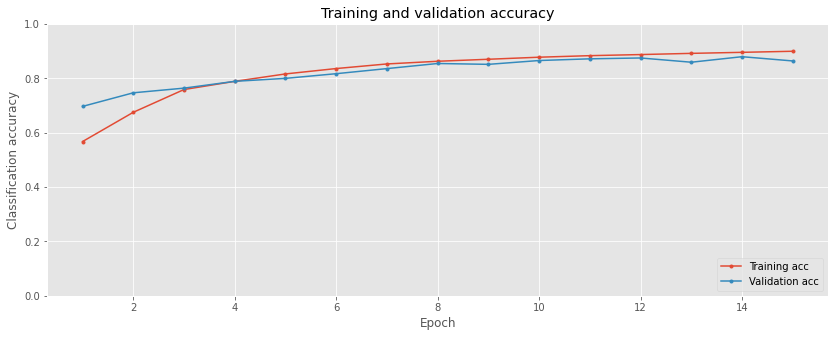

In [90]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [91]:
# Retrieve the embedding layer's weights from the trained model

weights = model.layers[1].get_weights()[0]

In [98]:

!mkdir data
!touch ./data/vecs.tsv ./data/meta.tsv


mkdir: cannot create directory ‘data’: File exists


In [100]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('data', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('data', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in imdb_word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [32]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Embedding, Dense
from tensorflow.keras.models import Sequential

In [4]:
# Create a SimpleRNN layer and test it

simplernn_layer = SimpleRNN(16)

In [7]:
# Note that only the final cell output is returned

sequence = tf.constant([[[1., 1.], [2., 3.], [56., -100]]]) # shape (1, 3, 2)
# print(sequence)
layer_output = simplernn_layer(sequence)
layer_output # returns a single 16-dimensional vector

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[ 1.        ,  1.        , -0.02988396, -1.        ,  1.        ,
        -1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        , -1.        ,
        -1.        ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [8]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [12]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)

In [13]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [14]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index()

#### Create a recurrent neural network model

In [28]:
# Get the maximum index value

max_index_value = max(imdb_word_index.values())
print(max_index_value)

embedding_dim = 16

In [26]:
# largest_value = 0
# largest_key = 'None'

# for i, (key, value) in enumerate(imdb_word_index.items()):

#     if largest_value < value:
#         largest_value = value
#         largest_key =  key
#         print(i, largest_key, largest_value)

In [45]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

model = Sequential([
    Embedding(input_dim=max_index_value + 1, output_dim=embedding_dim, mask_zero=True),
    LSTM(units=16),
    Dense(1, activation='sigmoid')
])

#### Compile and fit the model

In [46]:
# Compile the model with binary cross-entropy loss

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
print(x_train.shape)
print(x_test.shape)

(17121, 249)
(17588, 249)


In [48]:
# Fit the model and save its training history

history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test), validation_steps=20)

Epoch 1/3
536/536 [==============================] - 287s 527ms/step - loss: 0.4145 - accuracy: 0.7995 - val_loss: 0.2564 - val_accuracy: 0.8984
Epoch 2/3
536/536 [==============================] - 280s 523ms/step - loss: 0.2184 - accuracy: 0.9188 - val_loss: 0.2673 - val_accuracy: 0.8922
Epoch 3/3
536/536 [==============================] - 279s 520ms/step - loss: 0.1656 - accuracy: 0.9412 - val_loss: 0.3400 - val_accuracy: 0.8609


In [49]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [52]:
# model.save('model.h5')

# import json
# with open('history', 'w') as f:
#     json.dump(history.history, f)

In [56]:
# with open('history', 'r') as f:
#     loaded_history = json.load(f)

#### Plot learning curves

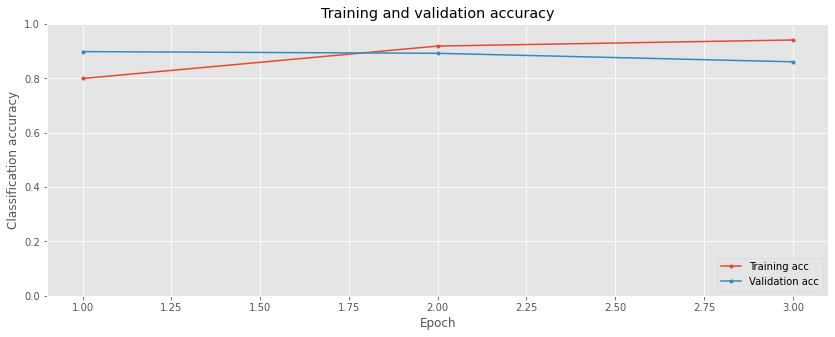

In [55]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history
# history_dict = loaded_history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [69]:
# View the first test data example sentence
# (invert the word index)

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}
' '.join([inv_imdb_word_index[index] for index in x_test[0] if index > 2])

"please give this one a miss br br and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite so all you madison fans give this a miss"

In [70]:
# Get the model prediction using model.predict()

print(x_test[None].shape)
print(x_test.shape)
model.predict(x_test[None, 0, :])

(1, 17588, 249)
(17588, 249)
1/1 [==============================] - 0s 54ms/step


array([[0.03188833]], dtype=float32)

In [71]:
# Get the corresponding label

y_test[0]

0

In [76]:
print(' '.join([inv_imdb_word_index[index] for index in x_test[1] if index > 2]))
print(model.predict(x_test[None, 1, :]))
print(y_test[1])

i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely idiotic the things that happen with the dead kids are very cool but the alive people are absolute idiots i am a grown man pretty big and i can defend myself well however i would not do half the stuff the little girl does in this movie also the mother in this movie is reckless with her children to the point of neglect i wish i wasn't so angry about her and her actions because i would have otherwise enjoyed the flick what a number she was take my advise and fast forward through everything you see her do until the end also is anyone else getting sick of watching movies that are filmed so dark anymore one can hardly see what is being filmed as an audience we are involved with the actions on the screen so then why the hell can't we have night vision
1/1 [==============================] - 0s 84ms/step
[[0.19097316]]
0


---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDb review sentiment dataset

In [5]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [6]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(num_words=5000, maxlen=200)

In [7]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [8]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index()

1641221/1641221 [==============================] - 0s 0us/step


#### Build stacked and bidirectional recurrent models

In [9]:
# Get the maximum index value and specify an embedding dimension

max_imdb_word_index= max(imdb_word_index.values())
embedding_dim = 16
print(max_imdb_word_index)

10000


In [10]:
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, GRU
from tensorflow.keras.models import Sequential

In [11]:
# Using Sequential, build a stacked LSTM model via return_sequences=True

model = Sequential([
    Embedding(max_imdb_word_index + 1, embedding_dim, mask_zero=True),
    LSTM(units=32, return_sequences=True),
    LSTM(32, return_sequences=False),    # only the final output is returned
    Dense(1, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 lstm (LSTM)                 (None, None, 32)          6272      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 174,641
Trainable params: 174,641
Non-trainable params: 0
_________________________________________________________________


In [13]:
# this will throw an error - cant have an LSTM follow another LSTM layer
# if the first one does ont have return_sequences=True

# model2 = Sequential([
#     Embedding(max_imdb_word_index + 1, embedding_dim, mask_zero=True),
#     LSTM(units=32, return_sequences=False),
#     LSTM(32, return_sequences=False),    # only the final output is returned
#     Dense(1, activation='sigmoid')
# ])

In [14]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'

# 
model = Sequential([
    Embedding(max_imdb_word_index + 1, embedding_dim, mask_zero=True),
    Bidirectional(layer=LSTM(units=8), merge_mode='sum', 
                  backward_layer=GRU(units=8, go_backwards=True)),
    Dense(1, activation='sigmoid')
])


In [15]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer

model = Sequential([
    Embedding(max_imdb_word_index + 1, embedding_dim, mask_zero=True),
    Bidirectional(LSTM(8, return_sequences=True), merge_mode='concat'),
    GRU(8, return_sequences=False),
    Dense(1, activation='sigmoid')
])


#### Compile and fit the model

In [16]:
# Compile the model

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
# Train the model, saving its history

history = model.fit(x_train, y_train, epochs=3, batch_size=32, 
                    validation_data=(x_test, y_test), validation_steps=20)

Epoch 1/3
446/446 [==============================] - 574s 1s/step - loss: 0.4392 - accuracy: 0.7782 - val_loss: 0.3747 - val_accuracy: 0.8547
Epoch 2/3
446/446 [==============================] - 558s 1s/step - loss: 0.2372 - accuracy: 0.9087 - val_loss: 0.3458 - val_accuracy: 0.8687
Epoch 3/3
446/446 [==============================] - 558s 1s/step - loss: 0.1667 - accuracy: 0.9376 - val_loss: 0.3963 - val_accuracy: 0.8406


In [19]:
# import json

# with open('history_stacked_rnns', 'w') as f:
#     json.dump(history.history, f)

# model.save('model_stacked_rnns.hf')

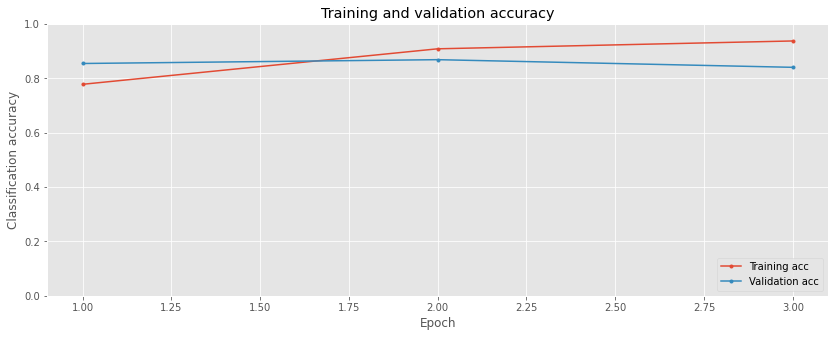

In [20]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);